# Regresión Polinómica, Overfitting y Underfitting

En este notebook nos enfocaremos en la implementación práctica de modelos de regresión para realizar predicciones. En particular, aprenderemos a construir modelos de regresión polinómica utilizando la librería `scikit-learn`, y exploraremos cómo evaluar su desempeño.

Además, abordaremos conceptos fundamentales como la capacidad de generalización del modelo. Para ello, utilizaremos gráficas de validación que nos permitirán diagnosticar si el modelo sufre de sobreajuste (overfitting) o subajuste (underfitting), y exploraremos técnicas como la regularización y la validación cruzada para mitigar estos problemas.

## Parte 1: Regresión Polinómica

La **regresión polinómica** es una extensión de la regresión lineal que permite modelar relaciones **no lineales** entre las variables de entrada y la salida. En lugar de ajustar una recta a los datos, se ajusta un polinomio de grado $d$. En el caso de una sola variable de entrada $x$, el modelo polinómico de grado $d$ se puede escribir como:

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + \cdots + w_d x^d = \sum_{k=0}^d w_k x^k
$$

donde:

- $\hat{y}$ es la predicción del modelo,
- $x$ es la variable de entrada,
- $( w_0, w_1, \dots, w_d)$ son los coeficientes del modelo.

El modelo ajusta los coeficientes $( w_0, w_1, \dots, w_d )$ para minimizar el **error cuadrático medio** (MSE) (o la distancia vertical entre puntos y curva):

$$
J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

donde:

- $m$ es el número de muestras,
- $\hat{y}^{(i)}$ es la predicción para la muestra $i$,
- $y^{(i)}$ es el valor real observado.

El procedimiento para entrenar una regresión polinómica es **idéntico al de la regresión lineal**, pero aplicado sobre un conjunto de datos transformados:

1. Primero, se transforman los datos de entrada $x$ usando `PolynomialFeatures` para generar:

   $$
   [x,\ x^2,\ x^3,\ \dots,\ x^d]
   $$

2. Luego se aplica `LinearRegression` sobre ese nuevo conjunto de características.

Este tipo de modelo es útil cuando los datos muestran una **tendencia curva**, como en los siguientes casos:

- Tareas con un punto óptimo intermedio (no linealidad con máximo o mínimo)
- Relaciones de saturación o rendimientos decrecientes
- Patrones cóncavos o convexos



Caso de uso: Como parte de un proyecto de consultoría, se entrevistó a diversas empresas para identificar tareas susceptibles de automatización. Para cada tarea evaluada, se recolectó la siguiente información:

- **Número de pasos manuales promedio** requeridos para completar la tarea.
- **Ahorro mensual estimado (en horas)** si se automatizara la tarea con RPA.

A continuación, simulamos un conjunto de datos basado en este tipo de escenarios para entrenar modelos de regresión.


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

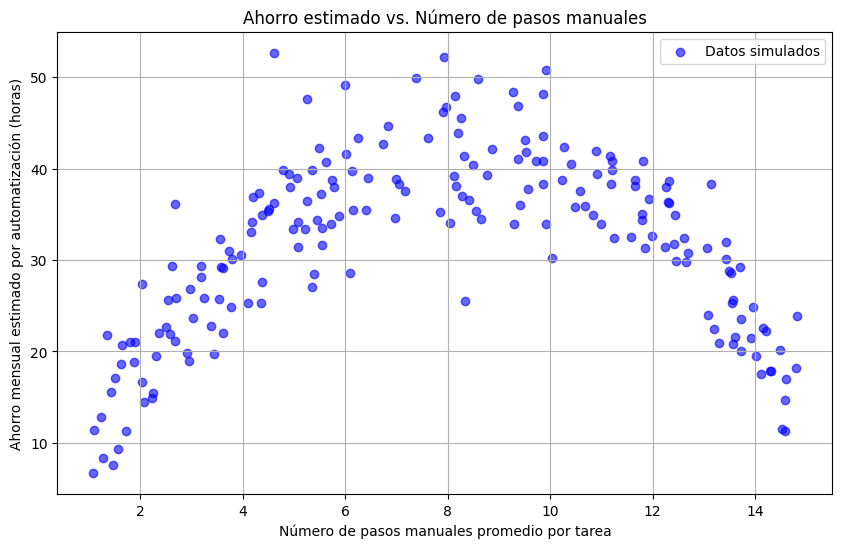

In [2]:
# Generación de datos simulados para el ahorro estimado por automatización

np.random.seed(42) # Semilla para reproducibilidad

# Número de pasos manuales promedio por tarea (entre 1 y 15)
X = np.sort(np.random.uniform(1, 15, size=200)).reshape(-1, 1)

# Modelo subyacente con forma de campana invertida (máximo beneficio en pasos intermedios)
a = 10    # efecto lineal
b = 0.6   # efecto cuadrático
ruido = np.random.normal(0, 5, size=X.shape)  # ruido gaussiano

# Ahorro estimado en horas por automatización
y = (a * X - b * X**2 + ruido).ravel()

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', label='Datos simulados')
plt.title('Ahorro estimado vs. Número de pasos manuales')
plt.xlabel('Número de pasos manuales promedio por tarea')
plt.ylabel('Ahorro mensual estimado por automatización (horas)')
plt.grid(True)
plt.legend()
plt.show()


**Importante: Notemos que no estamos separando los datos en datos de entrenamiento y testeo/prueba. Esto lo hacemos en este caso para simplificar el código ya que no vamos a evaluar el modelo en esta sección. Solamente queremos ganar una intuición visutal de la regresión**

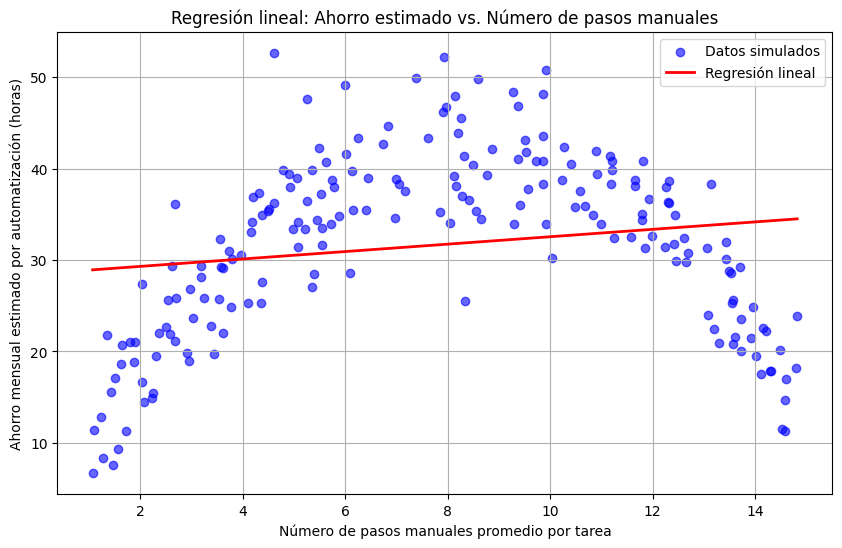

In [3]:
# Ajustar modelo de regresión lineal

modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)

# Predicciones sobre los mismos datos
y_pred_lineal = modelo_lineal.predict(X)

# Graficar los datos reales y la línea ajustada
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', label='Datos simulados')
plt.plot(X, y_pred_lineal, color='red', linewidth=2, label='Regresión lineal')
plt.title('Regresión lineal: Ahorro estimado vs. Número de pasos manuales')
plt.xlabel('Número de pasos manuales promedio por tarea')
plt.ylabel('Ahorro mensual estimado por automatización (horas)')
plt.legend()
plt.grid(True)
plt.show()


¡Necesitamos un modelo que no asuma una relación lineal entre las variables! Para eso usamos una regresión polinómica.

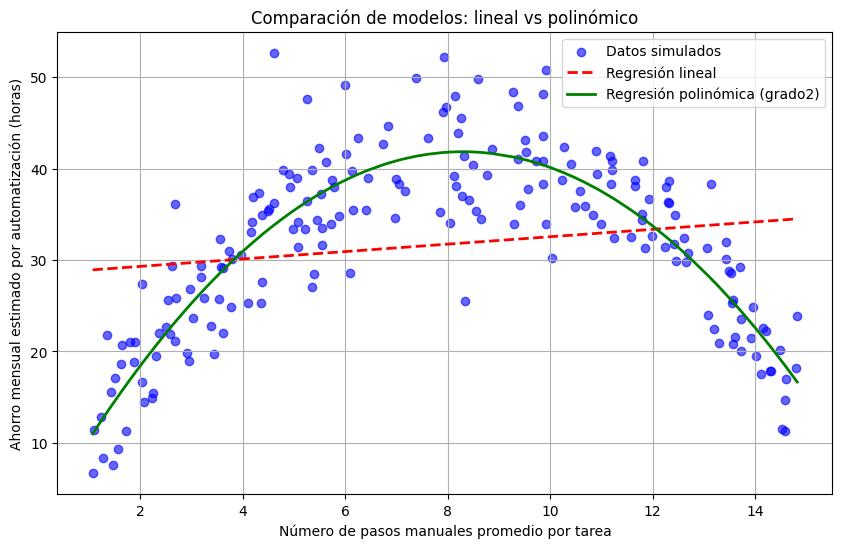

In [4]:
# Crear el modelo polinómico (primero)

grado_polinomico_1 = 2
modelo_polinomico_1 = make_pipeline(
    PolynomialFeatures(degree=grado_polinomico_1, include_bias=False),
    LinearRegression()
)

# Ajustar el modelo
modelo_polinomico_1.fit(X, y)

# Predicciones
y_pred_polinomico_1 = modelo_polinomico_1.predict(X)

# Graficar comparación
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', label='Datos simulados')
plt.plot(X, y_pred_lineal, color='red', linewidth=2, linestyle='--', label='Regresión lineal')
plt.plot(X, y_pred_polinomico_1, color='green', linewidth=2, label=f'Regresión polinómica (grado{grado_polinomico_1})')
plt.title('Comparación de modelos: lineal vs polinómico')
plt.xlabel('Número de pasos manuales promedio por tarea')
plt.ylabel('Ahorro mensual estimado por automatización (horas)')
plt.legend()
plt.grid(True)
plt.show()


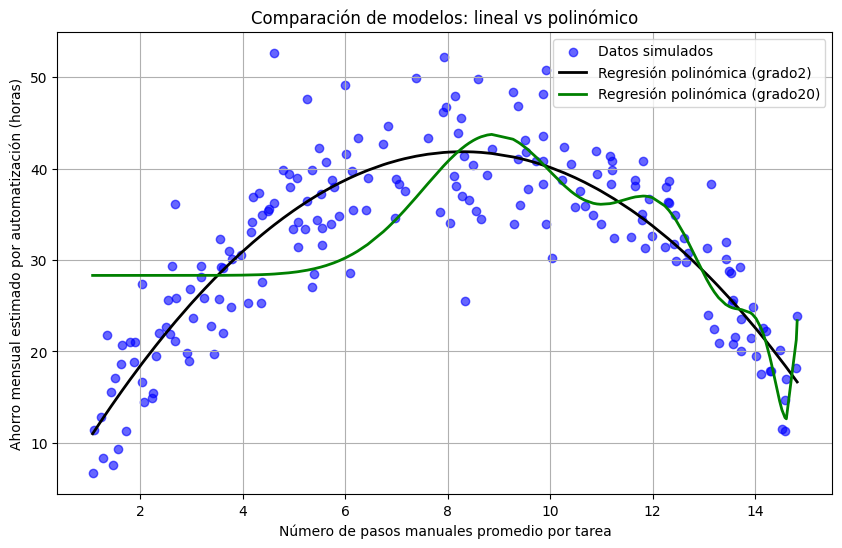

In [5]:
# Crear el modelo polinómico (segundo)

grado_polinomico_2 = 20
modelo_polinomico_2 = make_pipeline(
    PolynomialFeatures(degree=grado_polinomico_2, include_bias=False),
    LinearRegression()
)

# Ajustar el modelo
modelo_polinomico_2.fit(X, y)

# Predicciones
y_pred_polinomico_2 = modelo_polinomico_2.predict(X)

# Graficar comparación
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', label='Datos simulados')
plt.plot(X, y_pred_polinomico_1, color='black', linewidth=2, label=f'Regresión polinómica (grado{grado_polinomico_1})')
plt.plot(X, y_pred_polinomico_2, color='green', linewidth=2, label=f'Regresión polinómica (grado{grado_polinomico_2})')
plt.title('Comparación de modelos: lineal vs polinómico')
plt.xlabel('Número de pasos manuales promedio por tarea')
plt.ylabel('Ahorro mensual estimado por automatización (horas)')
plt.legend()
plt.grid(True)
plt.show()

El grado del polinomio que usamos es un **hiperparámetro**. ¿Cómo sabemos qué grado del polinomio es óptimo?

## Parte 2: Generalización del Modelo

El objetivo de cualquier modelo de aprendizaje automático no es solo ajustarse bien a los datos de entrenamiento, sino **generalizar**. Es decir, que el modelo debe comportarse bien con datos nuevos que nunca ha visto.

Decimos que un modelo generaliza bien cuando logra un buen equilibrio entre:

- **Capturar los patrones reales** en los datos de entrenamiento.
- **Evitar memorizar el ruido o las excepciones** específicas de esos datos.

Por otro lado, decimos que el modelo no generaliza bien si:

- El modelo es **demasiado simple**, no capta la estructura del problema: **subajuste (underfitting)**.
- El modelo es **demasiado complejo**, se ajusta incluso al ruido: **sobreajuste (overfitting)**.

En ambos casos, el modelo tendrá un **mal desempeño en datos nuevos**, lo que indica una **mala capacidad de generalización**.

Para evaluar esta capacidad, usamos dos errores distintos: Error de entrenamiento, el cual se calcula con los mismos datos usados para ajustar el modelo:

$$
J_{\text{train}}(\mathbf{w}) = \frac{1}{2m_{\text{train}}} \sum_{i=1}^{m_{\text{train}}} \left( \hat{y}_{\text{train}}^{(i)} - y_{\text{train}}^{(i)} \right)^2
$$

donde:

- $m_{\text{train}}$: número de ejemplos en entrenamiento,  
- $\hat{y}_{\text{train}}^{(i)}$: predicción del modelo,  
- $y_{\text{train}}^{(i)}$: valor real.

Y usamos el error en validación, el cual se calcula sobre datos **nunca vistos** por el modelo durante el entrenamiento:

$$
J_{\text{val}}(\mathbf{w}) = \frac{1}{2m_{\text{val}}} \sum_{i=1}^{m_{\text{val}}} \left( \hat{y}_{\text{val}}^{(i)} - y_{\text{val}}^{(i)} \right)^2
$$

donde:

- $m_{\text{val}}$: número de ejemplos en validación,  
- $\hat{y}_{\text{val}}^{(i)}$: predicción en validación,  
- $y_{\text{val}}^{(i)}$: valor real.

| Conjunto            | ¿Para qué se usa? | ¿Qué se aprende de él?                                   | ¿Se ve durante el entrenamiento? |
|---------------------|-------------------|-----------------------------------------------------------|----------------------------------|
| **Entrenamiento**   | Ajustar los parámetros del modelo (por ejemplo, los coeficientes $w$) | El modelo "aprende" a partir de estos datos                 | Sí                            |
| **Validación (CV)** | Evaluar distintos modelos o hiperparámetros (como el grado del polinomio) | Estimar la **capacidad de generalización** del modelo       | Solo se usa para validar     |
| **Prueba (test)**   | Evaluar el modelo final seleccionado                                 | Obtener una estimación del **rendimiento real** del modelo  | No se toca hasta el final    |

In [6]:
# Importamos librerías necesarias

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

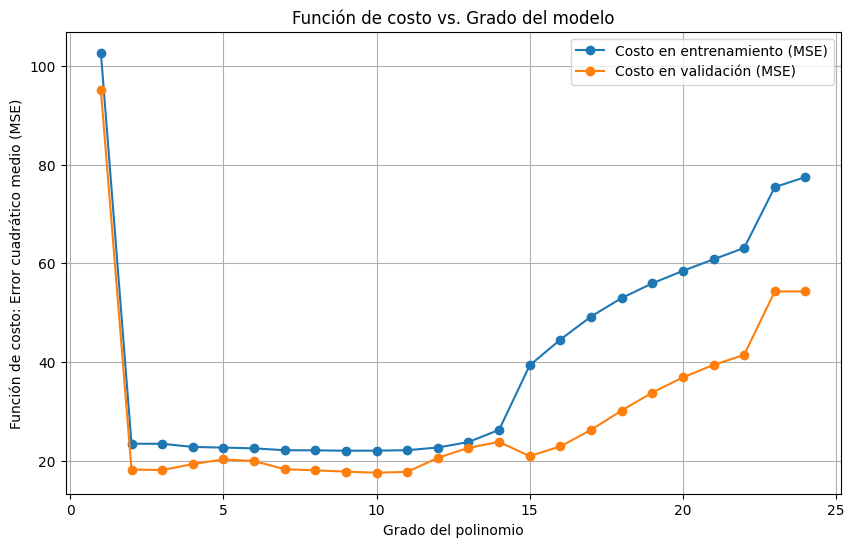

In [7]:
# Observación de overfitting y underfitting

# Dividir los datos en entrenamiento, validación y prueba

# Primero: train_temp y test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Luego: train y val desde el 80% restante
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)  # 0.2 sobre 80%, es decir 16%

# Evaluar diferentes grados del polinomio
grados = range(1, 25)
train_mse_list = []
val_mse_list = []

for grado in grados:
    modelo = make_pipeline(
        PolynomialFeatures(degree=grado, include_bias=False),
        LinearRegression()
    )
    modelo.fit(X_train, y_train)

    y_pred_train = modelo.predict(X_train)
    y_pred_val = modelo.predict(X_val)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    train_mse_list.append(mse_train)
    val_mse_list.append(mse_val)

# Paso 3: Graficar la función de costo en entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(grados, train_mse_list, marker='o', label='Costo en entrenamiento (MSE)')
plt.plot(grados, val_mse_list, marker='o', label='Costo en validación (MSE)')
plt.xlabel("Grado del polinomio")
plt.ylabel("Función de costo: Error cuadrático medio (MSE)")
plt.title("Función de costo vs. Grado del modelo")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Combinar datos
X_entrenamiento_final = np.vstack((X_train, X_val))
y_entrenamiento_final = np.concatenate((y_train, y_val))

# Entrenar modelo polinómico de grado 5
modelo_final = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression()
)
modelo_final.fit(X_entrenamiento_final, y_entrenamiento_final)

# Evaluar en el conjunto de prueba
y_pred_test = modelo_final.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Raíz del error cuadrático medio (RMSE) en el conjunto de prueba (grado 5): {rmse_test:.2f} horas al mes")

Raíz del error cuadrático medio (RMSE) en el conjunto de prueba (grado 5): 5.19 horas al mes


### Parte 2 A: Validación cruzada y GridSearchCV

La **validación cruzada** es una técnica fundamental para evaluar la capacidad de generalización de un modelo de aprendizaje automático.  
En lugar de entrenar y evaluar el modelo una sola vez con un conjunto de validación fijo, se divide el conjunto de datos en múltiples partes o *folds* para realizar múltiples evaluaciones más confiables. Funciona de la siguiente forma:

1. El conjunto de datos se divide en $k$ subconjuntos de tamaño similar.
2. El modelo se entrena $k$ veces, cada vez usando $k-1$ partes para entrenamiento y **1 parte distinta para validación**.
3. Se calcula una métrica (por ejemplo, el error cuadrático medio) en cada iteración.
4. Finalmente, se promedia esa métrica para obtener una estimación más robusta del desempeño del modelo.

`GridSearchCV` es una herramienta que **automatiza la búsqueda del mejor conjunto de hiperparámetros**, utilizando validación cruzada en cada combinación posible. Funciona de la siguiente manera:

1. Definimos una **rejilla (grid)** con los valores posibles de uno o más hiperparámetros.
2. Para cada combinación de valores en esa rejilla:
   - Se entrena el modelo usando validación cruzada.
   - Se calcula el promedio del desempeño (por ejemplo, el error cuadrático medio promedio).
3. Se **selecciona la combinación que obtuvo el mejor resultado promedio**.
4. Finalmente, se puede volver a entrenar el modelo con los mejores hiperparámetros usando todos los datos disponibles.

Esto nos permite tomar decisiones (sobre qué modelo usar) basadas en datos y no en suposiciones o intuición gráfica.

In [9]:
# Definir el pipeline: transformación polinómica + regresión lineal

pipeline = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression()
)

# Definir la grid de hiperparámetros (grados a probar)
param_grid = {
    'polynomialfeatures__degree': list(range(1, 15))
}

# Búsqueda en grilla con validación cruzada de 5 folds
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error', # Notemos que usamos 'neg_mean_squared_error' porque GridSearchCV busca maximizar la métrica, así que negamos el MSE para minimizarlo
    return_train_score=True
)

# Ajustar sobre todo el conjunto de datos
grid_search.fit(X, y)

# Mostrar el mejor resultado
mejor_grado = grid_search.best_params_['polynomialfeatures__degree']
mejor_mse = -grid_search.best_score_
mejor_rmse = np.sqrt(mejor_mse)
print(f"Grado óptimo encontrado: {mejor_grado}")
print(f"Raíz del error cuadrático medio (RMSE): {mejor_rmse:.2f} horas al mes")


Grado óptimo encontrado: 2
Raíz del error cuadrático medio (RMSE): 4.92 horas al mes


Según este cálculo, debemos escoger el modelo polinómico de segundo grado.

### Parte 2 B: Regularización Ridge

De manera alternativa (o incluso complementaria), podemos usar técnicas de **regularización** para mitigar el overfitting. Una de las más comunes es la regresión Ridge, que añade una penalización sobre los coeficientes del modelo para controlar su magnitud.

La regresión Ridge modifica el problema de optimización clásico y le añade a la función de costo un término que penaliza coeficientes de gran tamaño:

$$
J_{\text{ridge}}(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{d} w_j^2
$$

donde:

- $\hat{y}^{(i)}$ es la predicción para el ejemplo $i$,
- $y^{(i)}$ es el valor real observado,
- $w_j$ son los coeficientes del modelo,
- $\lambda \geq 0$ es el **parámetro de regularización** que controla el grado de penalización.


Si $\lambda = 0$, se recupera la regresión lineal estándar. Por otro lado, si $\lambda$ es grande, los coeficientes se reducen, lo que limita la complejidad del modelo. Esto ayuda a evitar el sobreajuste y mejora la capacidad de generalización del modelo a datos nuevos.


Al igual que en cualquier otro modelo, evaluamos su desempeño calculando el error en los datos usados para entrenar y en datos nuevos:


$$
J_{\text{train}}(\mathbf{w}) = \frac{1}{2m_{\text{train}}} \sum_{i=1}^{m_{\text{train}}} \left( \hat{y}_{\text{train}}^{(i)} - y_{\text{train}}^{(i)} \right)^2 + \lambda \sum_{j=1}^{d} w_j^2
$$
el cual incluye el término de regularización. Para la validación usamos

$$
J_{\text{val}}(\mathbf{w}) = \frac{1}{2m_{\text{val}}} \sum_{i=1}^{m_{\text{val}}} \left( \hat{y}_{\text{val}}^{(i)} - y_{\text{val}}^{(i)} \right)^2
$$




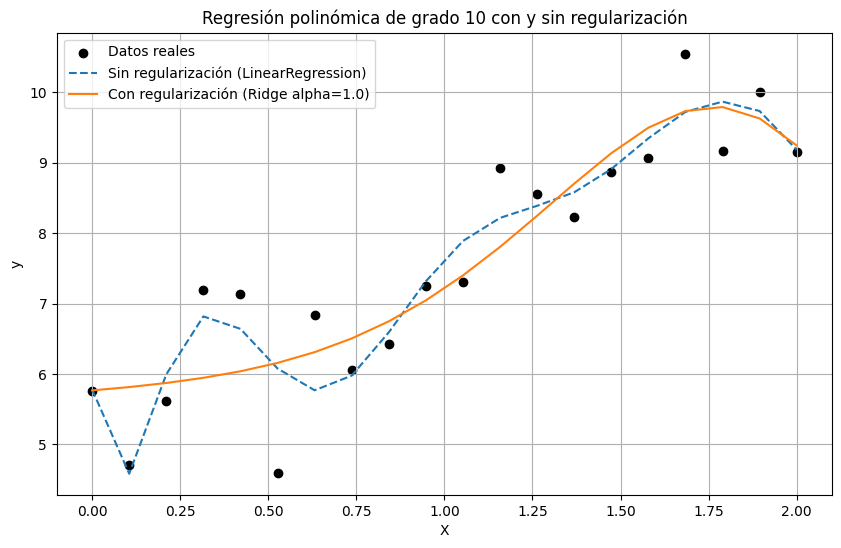

In [10]:
# Regresión polinómica con regularización

from sklearn.linear_model import  Ridge

# Paso 1: Generar datos sintéticos simples
np.random.seed(0)
X = np.linspace(0, 2, 20).reshape(-1, 1)
y = 4 + 3 * X.ravel() + np.random.normal(0, 1, size=X.shape[0])

# Paso 2: Crear modelos con pipelines
grado_polinomio = 10

modelo_sin_regularizacion = make_pipeline(
    PolynomialFeatures(degree=grado_polinomio, include_bias=False),
    LinearRegression()
)

modelo_con_regularizacion = make_pipeline(
    PolynomialFeatures(degree=grado_polinomio, include_bias=False),
    Ridge(alpha=1.0)
)

# Paso 3: Ajustar ambos modelos
modelo_sin_regularizacion.fit(X, y)
modelo_con_regularizacion.fit(X, y)

# Paso 4: Predicciones
y_pred_sin = modelo_sin_regularizacion.predict(X)
y_pred_con = modelo_con_regularizacion.predict(X)

# Paso 5: Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Datos reales')
plt.plot(X, y_pred_sin, '--', label='Sin regularización (LinearRegression)')
plt.plot(X, y_pred_con, '-', label='Con regularización (Ridge alpha=1.0)')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión polinómica de grado 10 con y sin regularización")
plt.legend()
plt.grid(True)
plt.show()
